# Check out the data DEP
Theres a funky tail, whats going in with that?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
#sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/scratch/halmazan/NEXT/IC_alter-blob-centre/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/scratch/halmazan/NEXT/testing/notebooks/FOM_creator/")
os.environ['ICTDIR']='/scratch/halmazan/NEXT/IC_alter-blob-centre/'

from IC.invisible_cities.io.dst_io import load_dst

In [10]:
# load in the data

RUN_NUMBER = ['15589']
TIMESTAMP  = ['213008']
CITY       = 'isaura'
# load
hdst_local = []
for RN, TS in zip(RUN_NUMBER, TIMESTAMP):
    print(f'R{RN}: {TS}', flush = True)
    if CITY == 'isaura':
        n100_dir = f'/scratch/halmazan/NEXT/PROCESSING/topology_cuts/data/{RN}/{CITY}/{TS}/'    
    else:
        n100_dir = f'/scratch/halmazan/NEXT/PROCESSING/topology_cuts/data/{RN}/{TS}/'
    #n100_dir = f'/scratch/halmazan/NEXT/PROCESSING/topology_cuts/data/{RN}/{isaura}/{TS}/'
    hdst_local.append(pd.read_hdf(f'{n100_dir}cut_hdst.h5'))
    print(f'Loaded!', flush = True)
hdst = pd.concat(hdst_local)
 

R15589: 213008
Loaded!


In [11]:
display(hdst)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
254,3269162,0,1.656663,418.931080,447,1131,1,-257.625,184.075,535.372375,...,645.355190,-162.625000,249.075000,561.490962,0.582063,0.227356,0.0,7.631579,7.692308,8.000000
443,164326,0,1.703802,359.609258,377,1081,1,-260.625,91.075,172.758500,...,198.658286,-218.623796,228.587916,422.996126,0.342407,0.074505,0.0,7.750000,7.894737,7.882353
457,3282070,0,1.595750,323.104754,437,1237,1,-90.625,-145.925,661.481125,...,726.020872,-65.625000,-95.925000,672.284132,0.290714,0.244239,0.0,7.903226,7.857143,7.733333
623,150053,0,1.600742,126.255952,311,1050,1,121.375,95.075,476.717500,...,520.717500,131.701125,170.075000,501.930614,0.107335,0.054513,0.0,7.692308,7.812500,8.000000
1250,1432600,0,1.514305,267.557989,420,1165,1,299.375,-166.925,573.666000,...,591.998431,334.375000,18.075000,697.666000,0.681546,0.036199,0.0,7.777778,7.857143,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115221,2020221,0,1.537995,200.699274,386,1142,1,245.375,232.075,436.535625,...,446.571375,295.375000,272.940453,576.535625,0.375951,0.046401,0.0,7.222222,7.500000,7.800000
115265,3499692,0,1.555322,341.512467,367,1136,1,3.375,-102.925,232.281500,...,241.643830,198.375000,12.075000,328.281500,0.536743,0.078842,0.0,7.962963,7.941176,8.000000
115643,3126620,0,1.739575,387.532028,476,1323,1,-145.625,-85.925,567.042250,...,576.968540,-60.214051,34.075000,694.793453,0.402863,0.080846,0.0,7.631579,7.777778,8.000000
115657,205163,0,1.594273,225.437794,493,1276,1,-356.625,-159.925,766.831250,...,793.379225,-313.831800,-109.925000,876.325610,0.401981,0.208912,0.0,7.812500,7.727273,8.000000


In [12]:
# eblob2 cut
cut_data = hdst[hdst.eblob2 > 0.2]


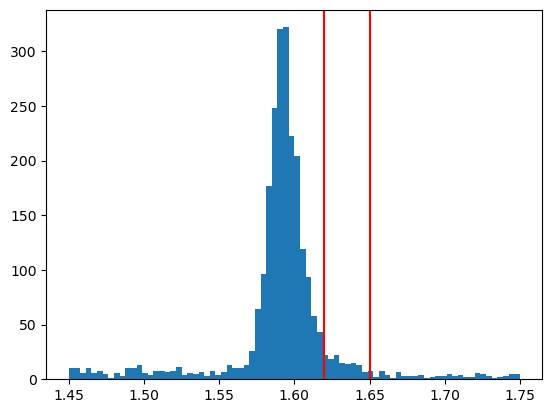

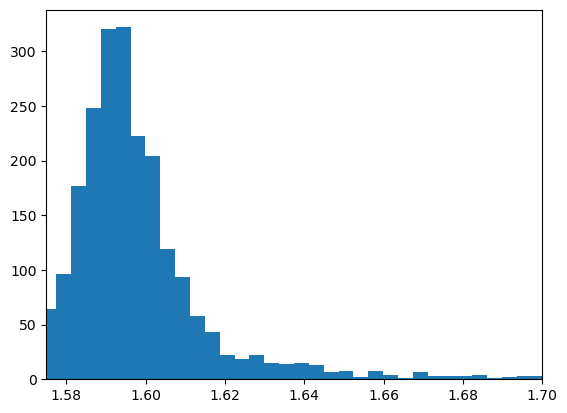

In [13]:
plt.hist(cut_data.energy, bins = 80)
plt.axvline(1.62, c = 'r')
plt.axvline(1.65, c = 'r')
plt.show()
plt.hist(cut_data.energy, bins = 80)

plt.xlim([1.575, 1.7])
plt.show()


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
9931,3485714,0,1.624448,185.732386,256,871,1,32.375,161.075,1064.333500,...,1141.589715,74.443910,174.235045,1074.583383,0.720167,0.541044,0.0,8.000000,7.857143,8.000000
19587,2741614,0,1.637546,114.017559,397,1139,1,191.375,42.075,527.866500,...,545.960825,219.083184,62.075000,607.082047,0.445808,0.312537,0.0,7.777778,7.692308,8.000000
20240,3079847,0,1.637689,235.192971,421,1191,1,-265.625,-9.925,726.288500,...,832.853047,-125.625000,10.075000,808.040877,0.402804,0.338564,0.0,8.000000,7.941176,7.750000
31806,2962807,0,1.639133,263.887589,442,1199,1,31.375,190.075,518.250000,...,608.385549,201.375000,255.075000,543.440148,0.422062,0.366087,0.0,7.777778,7.500000,7.714286
33190,1869666,0,1.630361,119.096002,385,1134,1,39.375,140.075,805.114125,...,856.909682,59.375000,183.046149,831.777000,0.491146,0.242143,0.0,7.692308,8.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93742,126497,0,1.629692,206.961366,358,1107,1,157.375,207.075,788.742250,...,806.981381,182.375000,234.427934,823.834188,0.515558,0.403050,0.0,7.800000,7.916667,8.000000
94420,521794,0,1.627336,373.619009,393,1090,1,-115.625,-392.925,196.243125,...,262.593061,10.812382,-280.570799,363.207427,0.448454,0.306495,0.0,7.750000,7.750000,8.000000
98358,3745182,0,1.637231,151.438967,393,1080,1,162.375,263.075,720.511625,...,771.061354,257.375000,278.075000,786.087632,0.533953,0.386198,0.0,7.812500,7.812500,7.636364
109039,3652103,0,1.646156,344.073642,433,1174,1,-251.625,138.075,310.813125,...,328.804709,-223.618888,160.152291,352.856198,0.364891,0.334049,0.0,7.692308,7.826087,7.666667


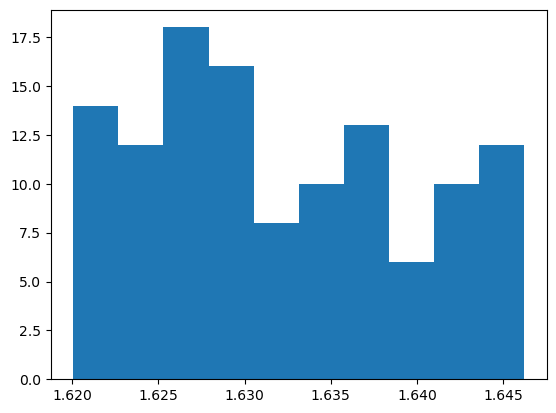

In [14]:
# select events only within this region, take their event numbers
dep_tail = cut_data[(cut_data.energy > 1.62) & (cut_data.energy < 1.65)]
display(dep_tail)
plt.hist(dep_tail.energy)
plt.show()

In [15]:
# extract all event numbers
tail_evts = dep_tail.event.unique()
print(tail_evts)

[3485714 2741614 3079847 2962807 1869666 2690899 1724108  136333 3348752
 2572116 3279865 1655144 1385105 3040241 3595425 2055768 2635340  719377
 3824479 1624295 3178450  769652  576445 2700217 1047202 2246470 1007239
 1886859  224548  456122  762169 2033810  692344 3079050 3074444 3801135
  495630 1122249  667873  900819 1046286 2876212 2642734  875437 2781684
 1895575 1259338 2457752 2158397   34170 3804433 1437159 2549159  346343
 2752488 2750206   67477  963568 2413737  106719 3630596 3314924 3326397
 2295787 3308253  744307 2135130 3220851 3604577 1317573 1760890 3242972
 1342143  953832 1934119  917103 2026029 2015809  549071 2777045 1774078
 1037146 2234776 1146780 3110981  656830 2617859 3502883 2349766 1288650
 2276399 3199720 3529672 1273341 3680725  887613 1466773  141001    9520
 1595286 3640833 3586324 3224795 2412095 1524607 2926427 2365055 3723643
 3243905 3494799 3460065 3553501 3455963 3839311  126497  521794 3745182
 3652103 3150308]


In [16]:
import os
# scan across an LDC, picking out these events, save them
TIMESTAMP_BEERSHEBA = '354015'
#path                = '/data/halmazan/NEXT/N100_LPR/15589/beersheba/354015/ldc3/'
path                = '/scratch/halmazan/NEXT/N100_LPR/15589/sophronia/230725/ldc3/'
files               = [f for f in os.listdir(path) if f.endswith('.h5')]

In [17]:
dep_tail_evts = []
for f in tqdm(files):
    try:
        df = load_dst(f'{path}{f}', 'RECO', 'Events')
        tail_df = df[df.event.isin(tail_evts)]
        if tail_df.empty:
            continue
        else:
            print('found events!')
            dep_tail_evts.append(tail_df)
    except Exception as e:
        print(f'{f}: {e}')
dep_tail_evts = pd.concat(dep_tail_evts)

 16%|███▎                | 887/5397 [00:11<01:01, 73.13it/s]

found events!


 22%|████               | 1164/5397 [00:15<00:51, 82.71it/s]

found events!


 23%|████▍              | 1267/5397 [00:16<00:42, 97.27it/s]

found events!


 26%|████▉              | 1388/5397 [00:18<00:42, 94.31it/s]

found events!
found events!


 37%|███████            | 1995/5397 [00:25<00:39, 86.17it/s]

found events!


 54%|██████████▎        | 2921/5397 [00:37<00:34, 71.80it/s]

found events!


 56%|██████████▌        | 3015/5397 [00:38<00:32, 73.43it/s]

found events!


 63%|████████████       | 3419/5397 [00:43<00:24, 81.92it/s]

found events!


 78%|██████████████▉    | 4234/5397 [00:52<00:13, 83.83it/s]

found events!


 83%|███████████████▋   | 4458/5397 [00:55<00:11, 83.73it/s]

found events!


 91%|█████████████████▏ | 4895/5397 [01:00<00:05, 95.88it/s]

found events!


 92%|█████████████████▍ | 4953/5397 [01:01<00:05, 81.74it/s]

found events!


 92%|█████████████████▌ | 4981/5397 [01:01<00:05, 81.61it/s]

found events!


100%|███████████████████| 5397/5397 [01:06<00:00, 81.69it/s]


In [19]:
display(dep_tail_evts)

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
3974,875437,1.752009e+09,38,51.105175,-23.933084,1,257.775,276.525,0.0,0.0,821.403875,7.671901,0.463353,-1.0,0.000003,-1,-1.0
3975,875437,1.752009e+09,38,51.105175,-23.933084,1,-126.975,230.375,0.0,0.0,849.903625,7.859681,-6.867406,-1.0,-0.000035,-1,-1.0
3976,875437,1.752009e+09,38,51.105175,-23.933084,1,-173.625,75.875,0.0,0.0,853.603000,8.016009,47.397906,-1.0,0.000231,-1,-1.0
3977,875437,1.752009e+09,38,51.105175,-23.933084,1,119.825,276.025,0.0,0.0,857.472125,7.267107,315.933868,-1.0,0.001633,-1,-1.0
3978,875437,1.752009e+09,38,51.105175,-23.933084,1,134.375,-63.075,0.0,0.0,861.567625,7.127256,259.050581,-1.0,0.001272,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,667873,1.752005e+09,29,116.755008,134.994974,1,381.175,245.425,0.0,0.0,908.214250,7.549189,61.101798,-1.0,0.000442,-1,-1.0
1212,667873,1.752005e+09,29,116.755008,134.994974,1,-467.075,214.325,0.0,0.0,919.664250,7.410172,11.452150,-1.0,NaN,-1,-1.0
1213,667873,1.752005e+09,29,116.755008,134.994974,1,57.625,199.275,0.0,0.0,919.664250,7.740283,11.962324,-1.0,0.000059,-1,-1.0
1214,667873,1.752005e+09,29,116.755008,134.994974,1,-404.875,-201.525,0.0,0.0,924.730125,8.362321,0.335217,-1.0,0.000002,-1,-1.0


In [20]:
#save df
dep_tail_evts.to_hdf('../data/tail_evts.h5', key = 'RECO')